In [1]:
import matplotlib.pyplot as plt
import numpy as np

NUMERICAL RECIPES FOR ASTROPHYSICS - SPRING 2019
First hand-in exercise

Prob 1. Preparing routlines.
a) Poisson Distribution

Output with (lambda,k) = (1,0):
0.36787944117144233
Output with (lambda,k) = (5,10):
0.018132788707821874
Output with (lambda,k) = (3,21):
1.0193398241110194e-11
Output with (lambda,k) = (2.6,40):
3.6151239949376895e-33

b) Random Number Generator

Seed = 283947129834792
Plot 1000 sequential random numbers against each other.
Plot 1000000 random numbers in 20 bins 0.05 wide.

Prob 2. Satellite galaxies.
a) Numerical integration

a = 2.0338257052407527
b = 1.8585893968705878
c = 1.5632918298767144
A = 0.021969720622467916

b) Log-log plot and interpolation

n(1.e-4) = 0.0016748853583823406
n(1.e-2) = 0.19566513711999023
n(1.e-1) = 2.093907272680403
n(1) = 15.648848277761513
n(5) = 1.1008605466231092
Plot log-log of n(x), x=[1.e-4, 1.e-2, 1.e-1, 1, 5], and its interplolation.

c) Numerical differentiation

Analytical solution of dn/dx at x=b is -1.099956384232414


h) 3D interporlation



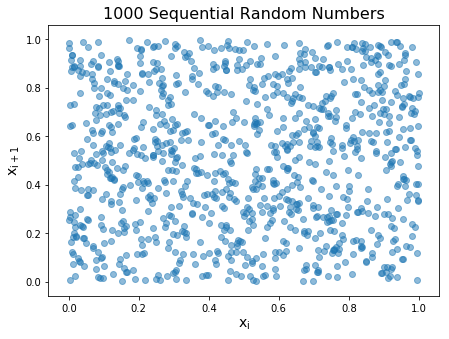

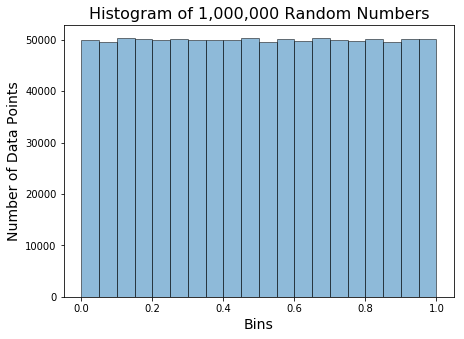

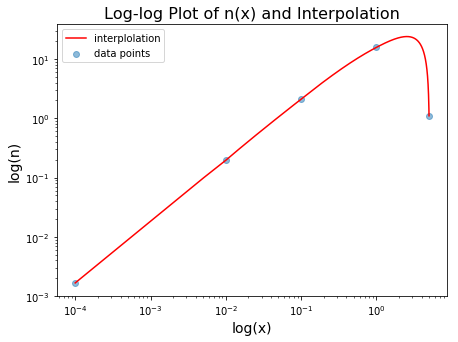

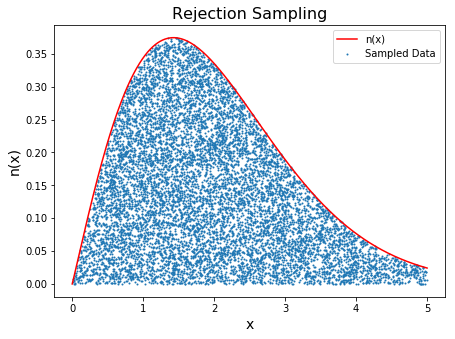

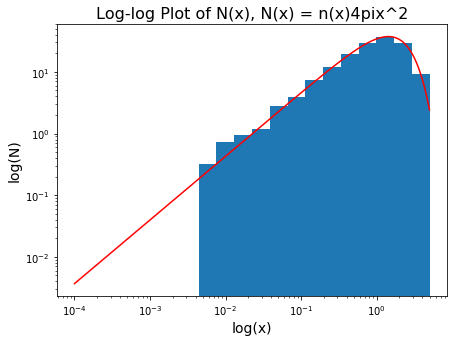

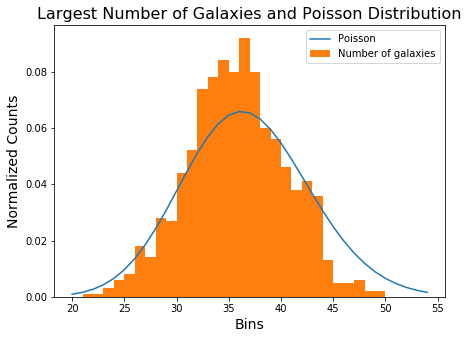

In [482]:
### NUMERICAL RECIPES FOR ASTROPHYSICS - SPRING 2019
### First hand-in exercise
print('NUMERICAL RECIPES FOR ASTROPHYSICS - SPRING 2019')
print('First hand-in exercise')
print()


# Prob 1. Preparing routlines.
print('Prob 1. Preparing routlines.')


# Part a)
print('a) Poisson Distribution')
print()

# Factorial function. Raises ValueError if x is not integral or is negative.
def factorial(n): 
    """
    The factorial function is defined by the product.
    n! = 1*2*3...*(n-2)*(n-1)*n
    """
    fact = 1
    
    if n < 0:
        raise ValueError('factorial() not defined for negative values')
    
    elif type(n) == float:
        raise ValueError('factorial() only accepts integral values')

    else:
        for i in range (1,np.int64(n+1)):
            fact = fact * i
        
    return float(fact)

# Poisson probability distribution for integer k, given a positive mean lambda. 
def Poisson(Lambda, k):
    Poisson = (Lambda**k)*(np.e**(-Lambda))/factorial(k)
    return Poisson

# Input values as required. 
Lambda = [1,5,3,2.6]
k = [0,10,21,40]

# Output results of the Poisson distribution.
[Poisson(Lambda[i],k[i]) for i in range(len(k))]
for i in range(len(k)):
    print('Output with (lambda,k) = ('+str(Lambda[i])+','+str(k[i])+'):')
    print(Poisson(Lambda[i],k[i]))


# Part b)
print()
print('b) Random Number Generator')
print()
 
# Set seed. Only once during the entire run.
I0=283947129834792
print('Seed = '+str(I0))

# All three methods from lecture slides are combined by applying 
# the input as the output of the previous method.

# (Multip.) Linear Congruential Generators. 
def lcg(I=I0, m=2**64-1, a=56675949247, c=10139042236):
    
    global I0
    I0 = (a*I0 + c) % m
    return I0

# Multiply with Carry (MWC) with base b = 2**32.
# Parameters acquired from lecture slides.
def mwc(a=4294957665):
    
    # Use the output of LCG as the input of MWC. 
    n = a*(lcg() & (2**32-1))+(lcg()>>32)
    return n

# 64-bit XOR-shift.
# Parameters acquired from lecture notes. 
def xor_shift_64(a1=21, a2=35, a3=4, P=2**64-1, ):
    
    # Use the output of MWC as the input of XOR-shift.
    X = mwc()
    Y = mwc()
    Z = mwc()
    W = mwc()
    
    # Set to 64-bit. 
    bit64 = 0xffffffffffffffff
    
    t = X^(X<<a2) & bit64 # Keep in 64-bit.
    X = Y
    Y = Z
    Z = W
    W = W^(W>>a1)^t^(t>>a3) & bit64 # Keep in 64-bit.
    
    return W / P # Gernerate numbers between 0 and 1. 

# Create two zeros arrays and assign x_i and x_i+1 with 1000 numbers.
x_i = np.zeros(1000)
x_i_plus_1 = np.zeros(1000)
for i in range(len(x_i)):
    x_i[i] = xor_shift_64()
    x_i_plus_1[i] = xor_shift_64()
    
# Plot x_i vs x_i+1 for the first 1000 numbers generated.
print('Plot 1000 sequential random numbers against each other.')
plt.figure(figsize=(7,5))
plt.title('1000 Sequential Random Numbers', fontsize=16)
plt.xlabel('x$_{\mathrm{i}}$', fontsize=14)
plt.ylabel('x$_{\mathrm{i+1}}$', fontsize=14)
plt.scatter(x_i, x_i_plus_1, alpha=0.5)

# Create an zeros array and assign 1000000 numbers.
one_million = np.zeros(1000000)
for i in range(len(one_million)):
    one_million[i] = xor_shift_64()

# Put 1000000 random numbers in 20 bins with 0.05 wide and plot them. 
print('Plot 1000000 random numbers in 20 bins 0.05 wide.')
plt.figure(figsize=(7,5))
plt.title('Histogram of 1,000,000 Random Numbers', fontsize=16)
plt.xlabel('Bins', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.hist(one_million, bins=20, alpha=0.5, histtype='bar', ec='black')


### Prob 2. Satellite galaxies.
print()
print('Prob 2. Satellite galaxies.')


# Part a)
print('a) Numerical integration')
print()

# Generate random numbers as required.
a = (2.5-1.1)*xor_shift_64()+1.1
b = (2-0.5)*xor_shift_64()+0.5
c = (4-1.5)*xor_shift_64()+1.5
print('a = '+str(a))
print('b = '+str(b))
print('c = '+str(c))

# Since there doen't exist any theta or phi dependence,
# the 3D spherical intergral can be simplied to a 1D integral multiplied with 4*pi*x**2.
# Cancel the constant N_sat on both sides and we have an integration equal to 1.
# A*intergral(n_1d) = 1. A is then just 1/result. 

n_1d = lambda x:4*np.pi*x**2*(x/b)**(a-3)*np.e**(-(x/b)**c)

# Since the lower bound is 0, the function becomes improper,
# and thus the midpoint rule is necessary in this integration. 

# Midpoint rule.
def midpoint(f, a, b, N):
    """
    f     ... function to be integrated
    [a,b] ... integration interval
    N     ... number steps(bigger the better but slower)
    
    """
    
    h = float(b-a)/N
    output = 0
    for i in range(N):
        output += f((a+h/2.0)+i*h)
    output *= h
    return output

# Calculate A.
A = 1/midpoint(n_1d,0,5,1000)
print('A = '+str(A))
print()

# Write out the density profile of the satellite galaxies.
N_sat = 100
def n(x): 
    return A*N_sat*(x/b)**(a-3)*np.e**(-(x/b)**c)

# Part b)
print('b) Log-log plot and interpolation')
print()

# Write out n values with inputs required. 
print('n(1.e-4) = '+str(n_1d(1.e-4)))
print('n(1.e-2) = '+str(n_1d(1.e-2)))
print('n(1.e-1) = '+str(n_1d(1.e-1)))
print('n(1) = '+str(n_1d(1)))
print('n(5) = '+str(n_1d(5)))

# Create x and n lists for plotting. 
x_range = [1.e-4, 1.e-2, 1.e-1, 1, 5]
n_x = []

# Append values and save them for plotting.
for i in range(len(x_range)):
    n_x.append(n_1d(x_range[i]))
    
# Choose interpolation method to be cubic spline.
# Page 31 of lecture slide 1 shows that the cubic spline method works 
# pretty well for a log-log fit. 
# Natural cubic spline is a piece-wise interpolation method with low-degree polynomials,
# which will prevent excessive oscillations and non-convergence. 
# In this proble, we have nearly a linear log fit and the number of data points is only 5,
# meaning that the degree of polynomials will be low and the interpolation will 
# be relatively accurate. 

# Define the natural cubic spline method. 
def cubic_spline(x, y, N):
    """
    x     ... input x value 
    y     ... funtion of x 
    N     ... number of fits (bigger the more accurate but slower)
    
    """
    
    # Initial setup.
    n = len(x)
    f = np.zeros(n)
    u = np.zeros(n)
    
    # The formula goes to N-2, so extend two more datapoints.
    xout = np.zeros(N+2)
    yout = np.zeros(N+2)
    
    # Define polynomials to fit up to n orders. 
    poly_nd = (y[n-1] - y[n-2])/(x[n-1] - x[n-2]) - (y[n-2] - y[n-3])/(x[n-2] - 
          x[n-3]) + (y[n-1] - y[n-3])/(x[n-1] - x[n-3])
    
    # Decomposition loop.
    for i in range(1, n-1):                    
        sigma = (x[i] - x[i-1])/(x[i+1] - x[i-1]) 
        P = sigma*f[i-1] + 2. 
        f[i] = (sigma - 1.)/P
        u[i] = (y[i+1] - y[i])/(x[i+1] - x[i]) - (y[i] - y[i-1])/(x[i] - x[i-1]) 
        u[i] = (6.*u[i]/(x[i + 1] - x[i - 1]) - sigma*u[i - 1])/P
        qn=0.5
        un=(3/(x[n-1]-x[n-2]))*(poly_nd-(y[n-1]-y[n-2])/(x[n-1]-x[n-2]))
        
    f[n-1] = (un - qn*u[n-2])/(qn*f[n-2] + 1.)
    
    for k in range(n-2, 1, -1):
        f[k] = f[k]*f[k+1] + u[k]

    # Initialization ends, begin fit.
    for i in range(1, N+2):
        xout[i] = x[0] + (x[n-1] - x[0])*(i-1)/(N) 
        # Bisection algorithm
        k_low = 0;    k_high = n-1
        while (k_high - k_low >1):
            k = (k_high + k_low) >> 1
            if (x[k] > xout[i]): 
                k_high  = k
            else: 
                k_low = k

        h = x[k_high] - x[k_low] 
        if (x[k] > xout[i]):  
            k_high = k
        else: 
            k_low = k 
        h = x[k_high] - x[k_low]
        a = (x[k_high] - xout[i])/h 
        b = (xout[i] - x[k_low])/h 
        yout[i] = (a*y[k_low]+b*y[k_high] + ((a**3-a)*f[k_low] + 
                 (b**3-b)*f[k_high])*(h*h)/6.)
        
    return xout[1:], yout[1:]

# Perform interpolation.
interp_density = cubic_spline(x_range, n_x, 1000)

# Plot log-log of n(x) and its interplolation.
print('Plot log-log of n(x), x=[1.e-4, 1.e-2, 1.e-1, 1, 5], and its interplolation.')
plt.figure(figsize=(7,5))
plt.title('Log-log Plot of n(x) and Interpolation', fontsize=16)
plt.xlabel('log(x)', fontsize=14)
plt.ylabel('log(n)', fontsize=14)
plt.xscale('log') # log scale for x
plt.yscale('log') # log scale for y
plt.scatter(x_range, n_x, alpha=0.5, label='data points')
plt.plot(interp_density[0], interp_density[1], 'r', label='interplolation')
plt.legend()


# Part c)
print()
print('c) Numerical differentiation')
print()

# Analytical solution calculated by hand.
# -(b**3*A*N_sat*(x/b)**a*(c*(x/b)**c-a+3)*e**(-(x/b)**c))/x**4

analytical_solution_x_equal_to_b = -A*N_sat*(c-a+3)/(b*np.e)
print ('Analytical solution of dn/dx at x=b is '+ str(analytical_solution_x_equal_to_b)+'.')

# Define the numerical differentiator using central difference method.
def central_difference(f,a,h=0.01):
    """
    f   ... function to be differentiated 
    a   ... value computed at x = a 
    h   ... step size
    """
    return (f(a + h) - f(a - h))/(2*h)

print('Numerical solution of dn/dx at x=b is '+str(central_difference(n, b))+'.')

# Part d)
print()
print('d) Sampling')
print()

# Choose sampling method to be rejection.
def rejection_sampling(function, x_min, x_max, y_min, y_max, N_sample): 
    """
    function         ... weighting function to put in 
    [x_min, x_max]   ... range of x
    [y_min, y_max]   ... range of y 
    N_sample         ... number of sample points
    """
    
    # Create empty sample arrays and assign values later. 
    data_x = np.empty(N_sample)
    data_y = np.empty(N_sample)
    
    # Sample points counter. 
    accepted = 0
    
    while accepted < N_sample: 
        
        # Generate random x and y values between [0,5] use the random generator above.
        test_x = (x_max-x_min)*xor_shift_64()+x_min
        test_y = (y_max-y_min)*xor_shift_64()+y_min
        
        # Apply rejection method. 
        if test_y <= weight(test_x): 
            data_x[accepted] = test_x
            data_y[accepted] = test_y
            accepted += 1
            
    return data_x, data_y

# Define weighting function.
weight = lambda x: A*4*np.pi*x**2*(x/b)**(a-3)*np.e**(-(x/b)**c)

# Sample the distribution. 
sample_x, sample_y = rejection_sampling(weight, 
                                        0, 
                                        5, 
                                        min(weight(np.arange(x_range[0], x_range[-1], 0.001))), 
                                        max(weight(np.arange(x_range[0], x_range[-1], 0.001))), 
                                        10000)

# Plot the sampling.
print('Plot rejection sampling of n(x).')
plt.figure(figsize=(7,5))
plt.title('Rejection Sampling', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('n(x)', fontsize=14)
plt.plot(np.arange(0, 5, 0.001), weight(np.arange(x_range[0], x_range[-1], 0.001)), 'r', label='n(x)')
plt.scatter(sample_x, sample_y, s=1, label='Sampled Data')
plt.legend()
#plt.figure(figsize=(7,5))
#plt.hist(sample_x, bins=100,alpha=0.5, histtype='bar', ec='black')
#plt.title('Histogram of Random Points', fontsize=16)
#plt.xlabel('Bins', fontsize=14)
#plt.ylabel('Number of Data Points', fontsize=14)

# Define a function to generate r, phi, and theta in one halo. 
def one_halo(n_satellite):
    r_sat = rejection_sampling(weight, 0, 5, 
                               min(weight(np.arange(x_range[0], x_range[-1], 0.001))), 
                               max(weight(np.arange(x_range[0], x_range[-1], 0.001))), 
                               1000)[0][0:n_satellite]
    phi_sat = np.zeros(n_satellite)
    theta_sat = np.zeros(n_satellite)
    
    for i in range(n_satellite):
        phi_sat[i] = (2*np.pi-0)*xor_shift_64()
        theta_sat[i] = (np.pi-0)*xor_shift_64()
    return r_sat, theta_sat, phi_sat

one_halo_100_sat = one_halo(100)

print('Positions (r, phi, theta) for 100 satellites:')
print()
print('r = '+str(one_halo_100_sat[0]))
print()
print('phi = '+str(one_halo_100_sat[1]))
print()
print('theta = '+str(one_halo_100_sat[2]))

# Part e)
print()
print('e) Log-log histogram')
print()

# Define N(x). 
def N(x):
    return n(x)*4*np.pi*x**2

# Define mean calculator. 
def mean(array):
    return float(sum(array)) / len(array)

# Generate 1000 haloes. 
def multi_halo(n_halo):
    r_halo = []
    phi_halo = []
    theta_halo = []

    for i in range(n_halo):
        r, theta,phi = one_halo(100)
        r_halo.append(r)
        theta_halo.append(theta)
        phi_halo.append(phi)
        
    return r_halo, theta_halo, phi_halo

one_thousand_haloes = multi_halo(1000)

all_radii = np.concatenate(one_thousand_haloes[0])

bin_radii = np.histogram(all_radii, bins=np.logspace(np.log10(1.e-4),np.log10(5.0), 21), weights=None)

def average_number_of_satellites(bin_values, bins):
    """
    Calculate the average number of galaxies in each bin by dividing the sum of
    satellites in the bins to get the mean. Since the bins are in logarithmic
    space, the average number is then normalized back to the original scale by 
    dividing the bin width. 

    """
    
    average_number = np.zeros(len(bin_values))
    
    for idx, value in enumerate(bin_values):
        normalized_average = (value/len(one_thousand_haloes[0])) / (bins[idx+1] - bins[idx])
        average_number[idx] = (normalized_average)
        
    return np.array(average_number)

average_num_of_sat = average_number_of_satellites(bin_radii[0], bin_radii[1])

log_spaced_x = np.logspace(np.log10(1.e-4), np.log10(5.0), 20)

# Plot log-log of N(x).
plt.figure(figsize=(7,5))
plt.title('Log-log Plot of N(x), N(x) = n(x)4pix^2', fontsize=16)
plt.xlabel('log(x)', fontsize=14)
plt.ylabel('log(N)', fontsize=14)
plt.xscale('log') # log scale for x
plt.yscale('log') # log scale for y
plt.plot(np.arange(1.e-4, 5, 0.001), N(np.arange(1.e-4, 5, 0.001)), 'r', label='N(x)')
plt.hist(log_spaced_x, weights=average_num_of_sat, bins=np.logspace(np.log10(1.e-4), np.log10(5.0), 21))

# Part f)
print()
print('f) Root-finding')
print()


# Choose root-finding method to be bisection.
def bisection(xminus, xplus, iterations, eps, root):
    """
    [x-,x+]     ... bracket of the root
    iterations  ... max number of iterations
    eps         ... floating-point relative accuracy
    root        ... wanted y value of the input funtion
    """
    for i in range(0,iterations):
        x=(xminus+xplus)/2  # Mid point
        if N(x) > root:   # Root in other half
            xplus=x     # Change x+ to x
        else:
            xminus=x    # Change x- to x
        if(xplus-xminus<eps):   # If converged
            print('root found with precision eps = ',eps)
            break
        if i==iterations-1: # If not converged
            print('root not found after Nmax iterations. ')
        print('iteration ends at round %2d: x = %.12f and n(x) = %9.12f' % (i, x, N(x)))

    return x

# Range of x given as the input of the function.
# Root wanted in this case is the half of maximum value of N(x).

x_space = np.arange(1.e-4, 5, 0.001)
root=bisection(1.e-4, 5, 100, 1.e-12, (max(N(x_space))/2))
print('Root =',root)


# Part g)
print()
print('g) Sorting, histogram, and Poisson over-plotting')
print()

# Define median calculator. 
def median(lst):
    quotient, remainder = divmod(len(lst), 2)
    if remainder:
        return sorted(lst)[quotient]
    return float(sum(sorted(lst)[quotient - 1:quotient + 1]) / 2)

# Define quantile function. 
def quantile(lst, per):
    i = int(0.01*per*len(lst))
    quant = sorted(lst)[i]
    return quant


# Get the radial bin containing the largest number of galaxies. 
def largest_radial_bin(values, bin_values):
    """
    Take the radial bin from 1000 haloes and find the one that contains the largest
    number. 
    """
    
    largest_bin = values[np.where((values>bin_values[18])*(values<bin_values[19]))]
        
    return largest_bin

largest_rad_bin = largest_radial_bin(all_radii, bin_radii[1])

print('Median of radii of the largest galaxies for 1000 haloes = '
      +str(median(largest_rad_bin)))
print('16th percentile of radii of the largest galaxies for 1000 haloes = '
      +str(quantile(largest_rad_bin, 16)))
print('84th percentile of radii of the largest galaxies for 1000 haloes = '
      +str(quantile(largest_rad_bin, 84)))

def counting_galaxies_in_halo(input_bin, halo_bin):
    number = np.zeros(len(halo_bin))
    for i in range(len(halo_bin)):
        number[i] = len(list(set(input_bin) & set(halo_bin[i])))
    return number

num_galaxies_in_halo = counting_galaxies_in_halo(largest_rad_bin, one_thousand_haloes[0])

Poisson_galaxies = []
for i in range(20,55):
    Poisson_galaxies.append(Poisson(max(average_num_of_sat), i))

# Generate plots. 
plt.figure(figsize=(7,5))
plt.title('Largest Number of Galaxies and Poisson Distribution', fontsize=16)
plt.xlabel('Bins', fontsize=14)
plt.ylabel('Normalized Counts', fontsize=14)
plt.plot(range(20,55), Poisson_galaxies, label='Poisson')
plt.hist(num_galaxies_in_halo, bins=range(20,55), density=True, label='Number of galaxies')
plt.legend()

# Part h)
print()
print('h) 3D interporlation')
print()

new_a = np.arange(1.1, 2.6, 0.1)
new_b = np.arange(0.5, 2.1, 0.1)
new_c = np.arange(1.5, 4.1, 0.1)

def multi_A(a, b, c):
    A = np.zeros((len(a), len(b), len(c)))
    for i in range(len(a)):
        for j in range(len(b)):
            for k in range(len(c)):
                new_n_1d = lambda x:4*np.pi*x**2*(x/b[j])**(a[i]-3)*np.e**(-(x/b[j])**c[k])
                A[i][j][k] = 1/midpoint(new_n_1d, 0, 5, 100)
    return A

new_A = multi_A(new_a, new_b, new_c)

In [6]:
# Part h)
print()
print('h) 3D interporlation')
print()

new_a = np.arange(1.1, 2.6, 0.1)
new_b = np.arange(0.5, 2.1, 0.1)
new_c = np.arange(1.5, 4.1, 0.1)

def multi_A(a, b, c):
    A = np.zeros((len(a), len(b), len(c)))
    for i in range(len(a)):
        for j in range(len(b)):
            for k in range(len(c)):
                new_n_1d = lambda x:4*np.pi*x**2*(x/b[j])**(a[i]-3)*np.e**(-(x/b[j])**c[k])
                A[i][j][k] = 1/midpoint(new_n_1d, 0, 5, 100)
    return A

new_A = multi_A(new_a, new_b, new_c)


h) 3D interporlation



In [8]:
satgals_m15 = np.loadtxt('satgals_m15.txt', skiprows=4, usecols=0)
sorted(satgals_m15)

[0.028822907,
 0.056660576,
 0.065096207,
 0.070700791,
 0.072192941,
 0.072702101,
 0.072879392,
 0.085970404,
 0.087349345,
 0.090938598,
 0.097450376,
 0.10032921,
 0.1024369,
 0.10361367,
 0.10500914,
 0.10540606,
 0.10560142,
 0.1098741,
 0.11298562,
 0.11594633,
 0.11847237,
 0.12124229,
 0.12202359,
 0.12235347,
 0.12885342,
 0.12966309,
 0.13140692,
 0.13754951,
 0.14074662,
 0.14740191,
 0.14870961,
 0.15065246,
 0.15089714,
 0.15535682,
 0.16343479,
 0.16411831,
 0.16658216,
 0.16681905,
 0.16706048,
 0.16851302,
 0.16945221,
 0.17234507,
 0.17345784,
 0.17961984,
 0.17978213,
 0.18111708,
 0.18398072,
 0.18760078,
 0.188545,
 0.19129465,
 0.19513154,
 0.196456,
 0.19845778,
 0.2025767,
 0.20439707,
 0.20474032,
 0.21014832,
 0.21230389,
 0.21289109,
 0.21334344,
 0.21458262,
 0.21678516,
 0.21749511,
 0.22198653,
 0.22267085,
 0.22324978,
 0.2261555,
 0.22705753,
 0.22749339,
 0.22835196,
 0.22984439,
 0.23086796,
 0.23101189,
 0.23101262,
 0.23420618,
 0.23475728,
 0.235805